In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import zipfile

import seaborn as sns
sns.set()

#Make sure to pip install monkeylearn first
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer 
import string

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kendricknguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kendricknguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
final_df = pd.read_csv('data/tweets_stock_viable')
final_df.head()

,text,created_at,retweet_count,favorite_count,is_retweet,polarity,subjectivity,test,china,stock_dif,stock_up,tariff,farmer,trade,war,time_delta
0,The debates especially the second and third pl...,2016-11-13 18:46:00,23410.0,113207.0,False,0.335714,0.429762,0.302381,0,-0.25,0,0,0,0,0,0.0
1,If the election were based on total popular vo...,2016-11-15 13:34:00,49623.0,179219.0,False,0.306667,0.696667,0.306667,0,-0.25,0,0,0,0,0,2568.0
2,The Electoral College is actually genius in th...,2016-11-15 13:40:00,39125.0,128083.0,False,0.000000,0.400000,0.000000,0,-0.25,0,0,0,0,0,6.0
3,Very organized process taking place as I decid...,2016-11-16 02:55:00,27544.0,119611.0,False,0.143750,0.543750,0.143750,0,0.00,0,0,0,0,0,795.0
4,"I am not trying to get ""top level security cle...",2016-11-16 11:28:00,31102.0,99921.0,False,0.050000,0.550000,0.050000,0,0.25,1,0,0,0,0,513.0


In [13]:
final_df[(final_df['polarity']==1)&(final_df['subjectivity']==1)]['text'].values

array(['Looking forward to a speedy recovery for George and Barbara Bush both hospitalized. Thank you for your wonderful letter!',
       'Thank you for a wonderful evening in Washington D.C. #Inauguration https://t.co/a6xpFQTHj5',
       "Wonderful meeting with Canadian PM @JustinTrudeau and a group of leading CEO's &amp; business women from Canada\uf8ffüá®\uf8ffüá¶and th‚Ä¶ https://t.co/wAoCOaYeZ6",
       'Congratulations Eric &amp; Lara. Very proud and happy for the two of you! https://t.co/s0T3cTQc40',
       'HAPPY BIRTHDAY to our @FLOTUS Melania! https://t.co/rYYp51mxDQ https://t.co/np7KYHglSv',
       'Just completed call with President Moon of South Korea. Very happy and impressed with 15-0 United Nations vote on North Korea sanctions.',
       'Kim Jong Un of North Korea made a very wise and well reasoned decision. The alternative would have been both catastrophic and unacceptable!',
       'Happy 70th Birthday @USAirForce! https://t.co/snkXO40vXM',
       'Happy 70th Birthda

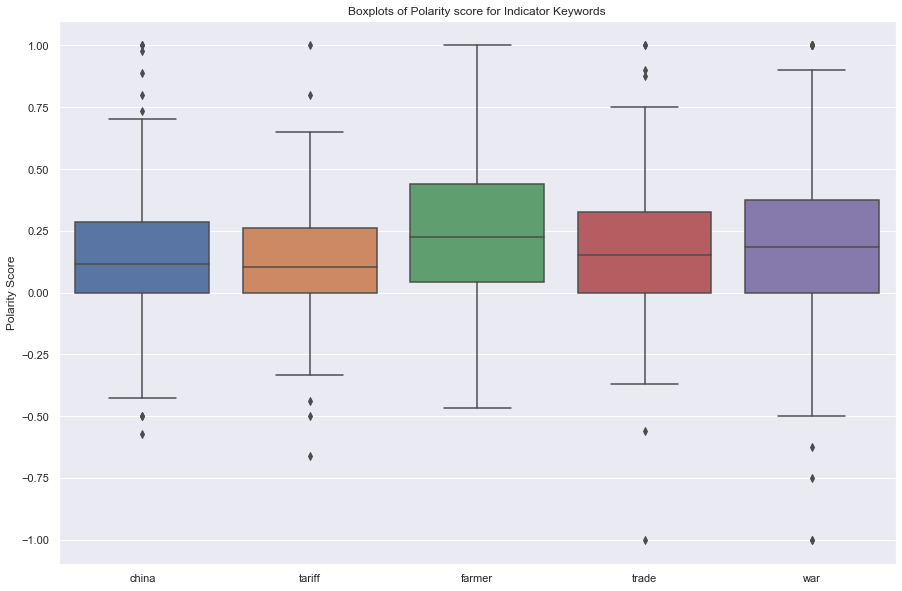

In [4]:
#Polarity by Indicators

plt.figure(figsize=(15,10))
sns.boxplot(data=[final_df[final_df['china']==1]['polarity'],
                  final_df[final_df['tariff']==1]['polarity'], 
                  final_df[final_df['farmer']==1]['polarity'], 
                  final_df[final_df['trade']==1]['polarity'],
                  final_df[final_df['war']==1]['polarity']])

plt.xticks(plt.xticks()[0], ['china', 'tariff', 'farmer', 'trade', 'war'])
plt.ylabel('Polarity Score')
plt.title('Boxplots of Polarity score for Indicator Keywords')
plt.show()


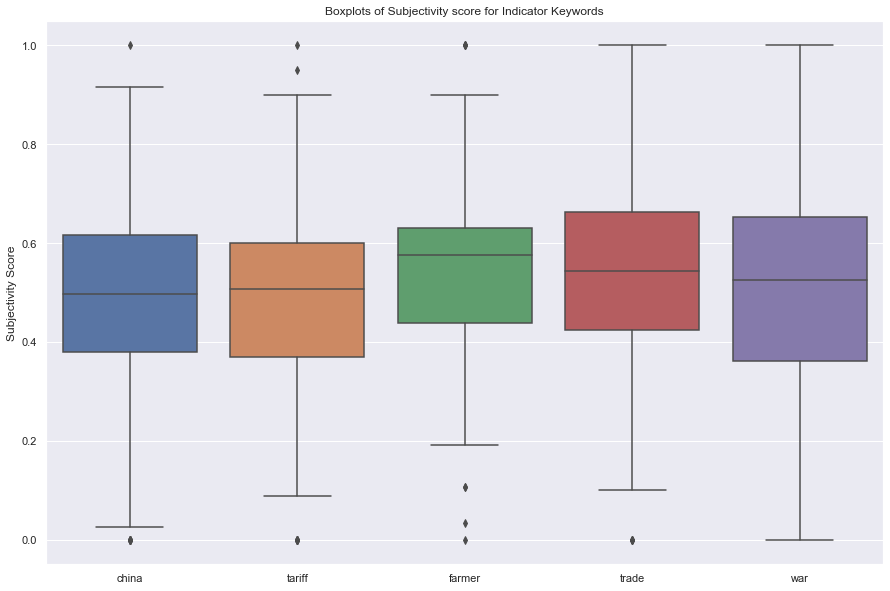

In [5]:
#Subjectivity by Indicators

plt.figure(figsize=(15,10))
sns.boxplot(data=[final_df[final_df['china']==1]['subjectivity'],
                  final_df[final_df['tariff']==1]['subjectivity'], 
                  final_df[final_df['farmer']==1]['subjectivity'], 
                  final_df[final_df['trade']==1]['subjectivity'],
                  final_df[final_df['war']==1]['subjectivity']])

plt.xticks(plt.xticks()[0], ['china', 'tariff', 'farmer', 'trade', 'war'])
plt.ylabel('Subjectivity Score')
plt.title('Boxplots of Subjectivity score for Indicator Keywords')
plt.show()

In [6]:
final_df.head()

,text,created_at,retweet_count,favorite_count,is_retweet,polarity,subjectivity,test,china,stock_dif,stock_up,tariff,farmer,trade,war,time_delta
0,The debates especially the second and third pl...,2016-11-13 18:46:00,23410.0,113207.0,False,0.335714,0.429762,0.302381,0,-0.25,0,0,0,0,0,0.0
1,If the election were based on total popular vo...,2016-11-15 13:34:00,49623.0,179219.0,False,0.306667,0.696667,0.306667,0,-0.25,0,0,0,0,0,2568.0
2,The Electoral College is actually genius in th...,2016-11-15 13:40:00,39125.0,128083.0,False,0.000000,0.400000,0.000000,0,-0.25,0,0,0,0,0,6.0
3,Very organized process taking place as I decid...,2016-11-16 02:55:00,27544.0,119611.0,False,0.143750,0.543750,0.143750,0,0.00,0,0,0,0,0,795.0
4,"I am not trying to get ""top level security cle...",2016-11-16 11:28:00,31102.0,99921.0,False,0.050000,0.550000,0.050000,0,0.25,1,0,0,0,0,513.0


In [7]:
times = pd.to_datetime(final_df['created_at'].values)
time_deltas = []
time_deltas.append(0)
for i in range(1, len(final_df)):
    time_deltas.append((times[i]-times[i-1]).total_seconds()/60)

/Users/kendricknguyen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


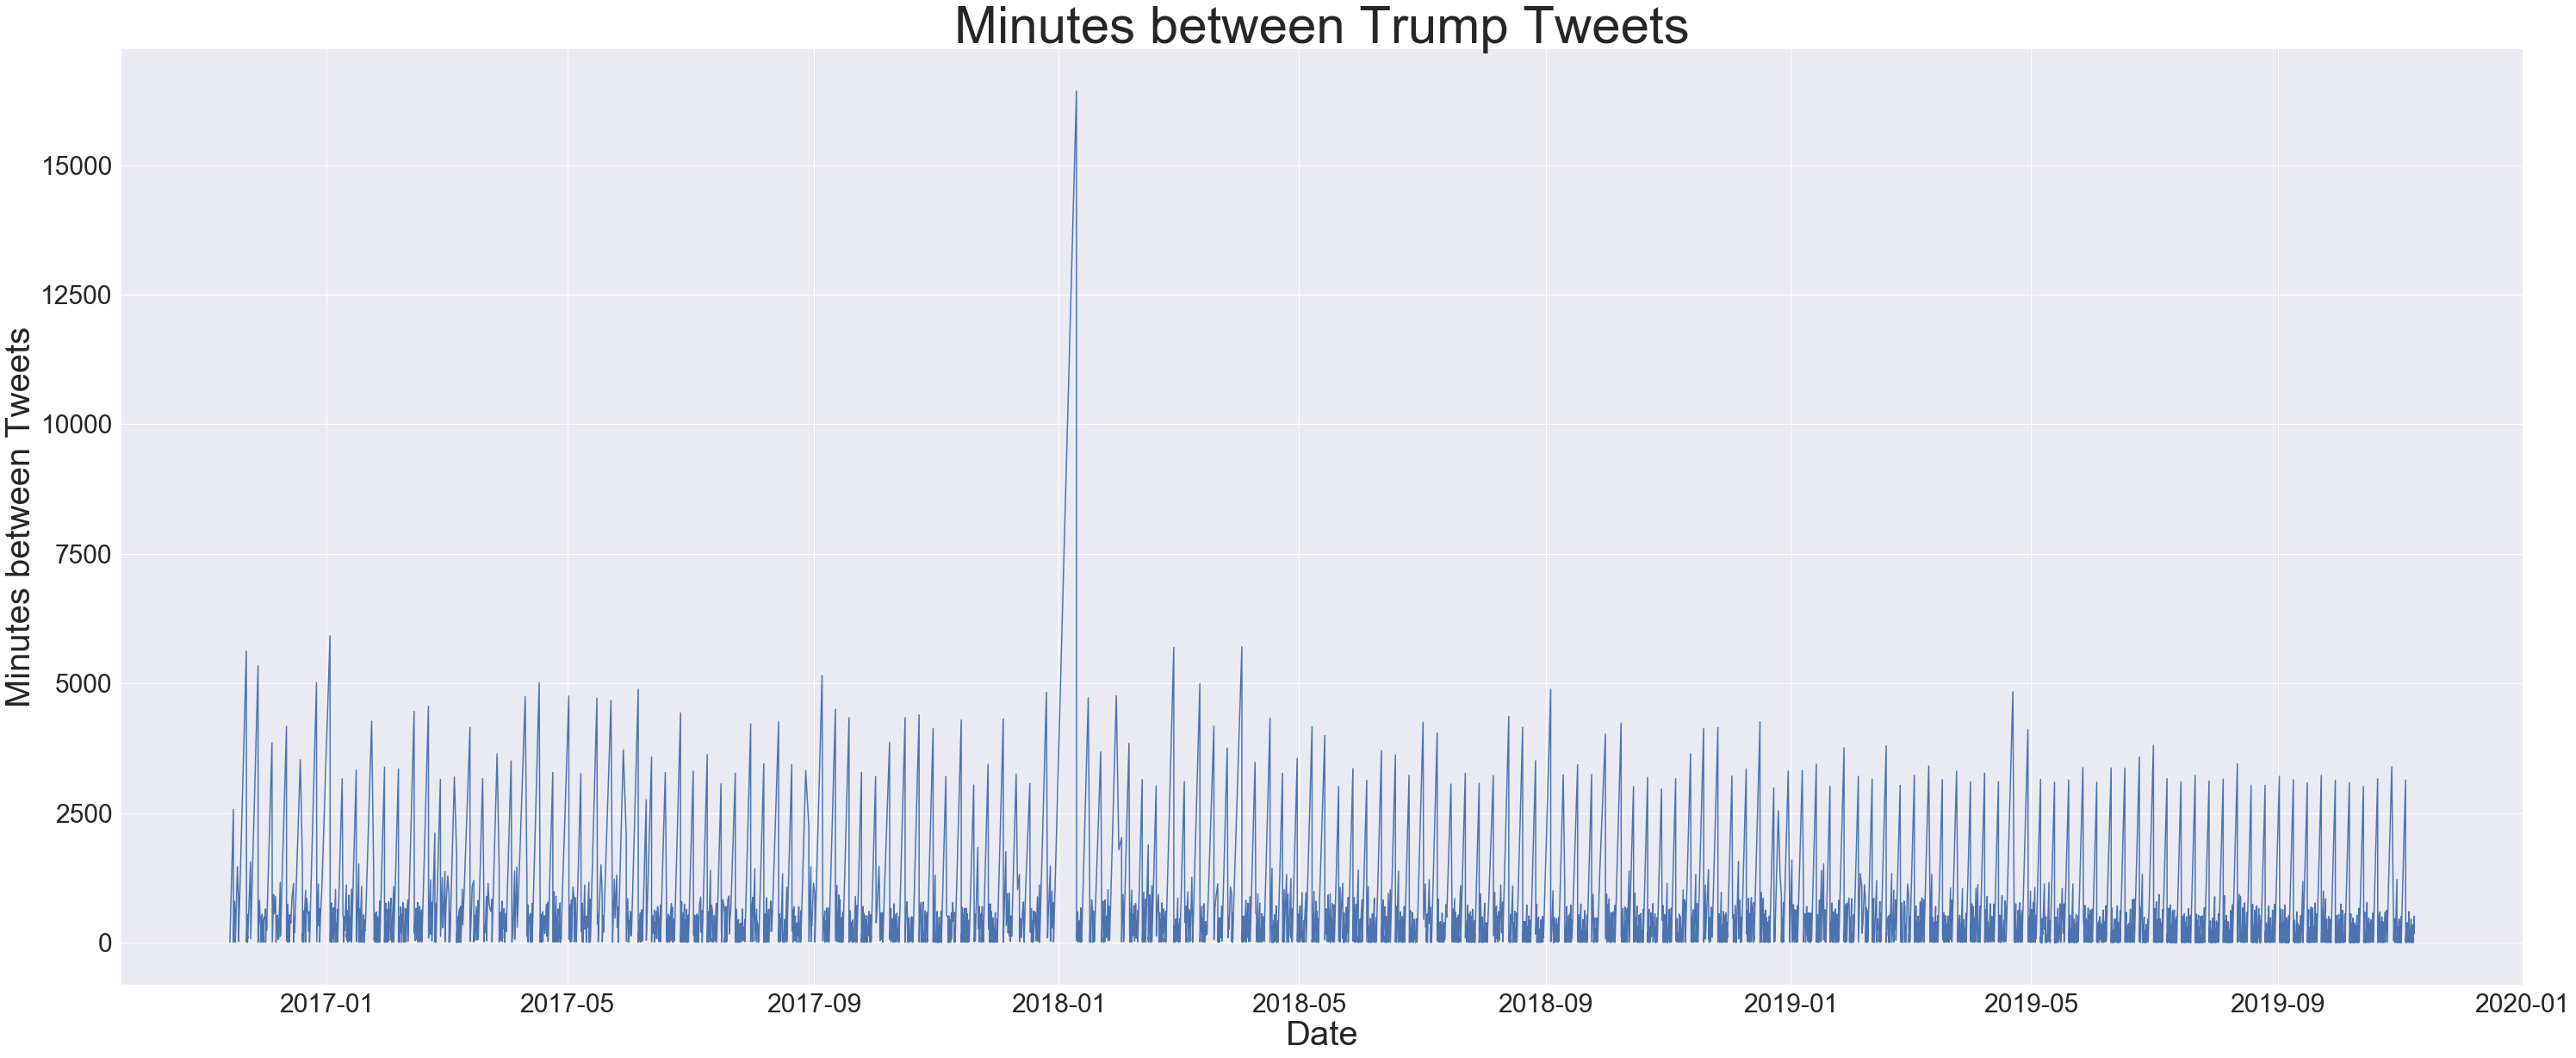

In [8]:
plt.figure(figsize = (50,20))
plt.plot(times, time_deltas)
plt.xticks(fontsize=30)
plt.yticks(fontsize = 30)
plt.xlabel('Date', fontsize = 40)
plt.ylabel('Minutes between Tweets', fontsize = 40)
plt.title('Minutes between Trump Tweets', fontsize = 60)
plt.show()

In [9]:
#Add Time Deltas to dataframe
final_df['time_delta'] = time_deltas
final_df.head()
final_df.to_csv('data/tweets_stock_viable', index = False)
